# Chap5 회귀

- 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법
- 독립변수 - 피처, 종속변수 - 결정 값
- 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 최적의 회귀 계수를 찾아내는 것
- 선형 회귀 : 실제 값과 예측값의 차이를 최소화는 직선형 회귀선을 최적화하는 방식
    - 일반 선형 회귀 : 예측값과 실제 값의 RSS를 최소화할 수 있도록 회귀 계수를 최적화, 규제 적용X
    - 릿지(Ridge) : 선형 회귀에 L2 규제를 추가한 회귀 모델. L2 규제는 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해 회귀 계수값을 더 작게 만드는 규제 모델
    - 라쏘(Lasso) : 선형 회귀에 L1 규제를 적용한 방식. L1 규제는 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 하는 것
    - 엘라스틱넷(ElasticNet) : L2, L1 규제를 함께 결합한 모델. 피처가 많은 데이터 세트에 적용. L1 규제로 피처의 개수 줄임과 동시에 L2 규제로 계수 값의 크기 조정
    - 로지스틱 회귀(Logistic Regression) : 분류에 사용되는 선형 모델. 이진 분류뿐만 아니라 희소 영역의 분류, 텍스트 분류와 같은 영역에서 뛰어난 예측 성능

## 단순 선형 회귀를 통한 회귀 이해

- 단순 선형 회귀 : 독립변수 1개, 종속 변수 1개인 선형 회귀
- 기울기 w1, 절편 w0을 회귀 계수로 지칭
- 잔차 : 실제 값과 회귀 모델의 차이에 따른 오류 값
- 최적의 회귀 모델을 만든다는 것 = 전체 데이터의 잔차 합이 최소가 되는 모델 만든다는 것 = 오류 값 합이 최소가 될 수 있는 최적의 회귀 계수 찾는다는 것
- 오류 합 계산할 때 - Mean Absolute Error, Residual Sum of Square
- Error^2 = RSS
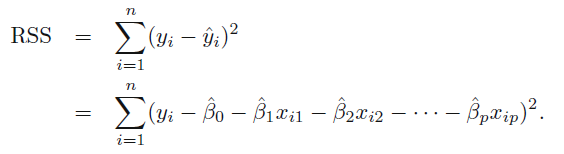

## 비용 최소화하기 - 경사 하강법(Gradient Descent)

- '점진적으로' 반복적인 계산을 통해 W 파라미터 값을 업데이트하면서 오류 값이 최소가 되는 W 파라미터 구하기
- 즉 예측값과 실제 값의 차이가 작아지는 방향성을 가지고 W 파라미터를 지속해서 보정해 나감
- 오류 값이 더 이상 작아지지 않으면 그 오류 값을 최소 비용으로 판단하고 그때의 W 값을 최적 파라미터로 반환
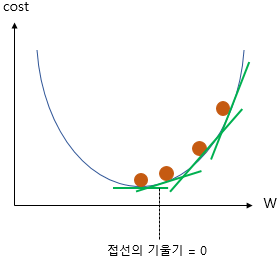

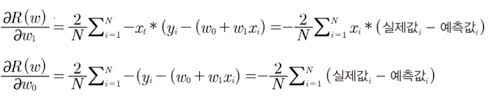

- 새로운 w1을 이전 w1에서 편미분 결괏밗을 빼면서 적용

1. w1, w0 임의의 값으로 설정하고 첫 비용 함수 값 계산
2. w1을 편미분 결괏값으로 뺀 값, w0을 편미분 결괏값으로 뺀 값으로 업데이트한 후 다시 비용함수 값 계산
3. 바용 함수 값이 감소했으면 다시 2번 반복. 더 이상 값이 감소하지 않으면 그때의 w1, w0 구하고 반복 중지

In [1]:
# 간단한 회귀식 y=4X+6에 근사하기 위한 100개의 데이터 세트 만들고 경사 하강법 이용해 회귀계수 도출하기
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

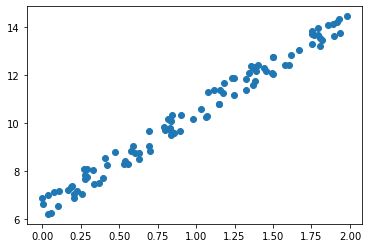

In [8]:
np.random.seed(1)
X = 2*np.random.rand(100, 1)
y=6+4*X+np.random.rand(100, 1)

plt.scatter(X, y)

In [3]:
# 비용 함수 정의
def get_cost(y, y_pred):
    N=len(y)
    cost=np.sum(np.square(y-y_pred))/N
    return cost

In [4]:
# 경사하강법 정의
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N=len(y)
    
    # 먼저 w1_update, w2_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    
    # 예측 배열 계산하고 예측과 실제 값 차리 계산
    y_pred = np.dot(X, w1.T)+w0  #내적
    diff = y-y_pred
    
    #w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N, 1))
    
    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))
    
    return w1_update, w0_update

In [5]:
# 경사 하강 방식으로 반복적으로 수행해 파라미터 업데이트
def gradient_descent_steps(X, y, iters=10000):
    # 초기화
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))
    
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1=w1-w1_update
        w0=w0-w0_update
        
    return w1, w0

In [9]:
# RSS 차이 계산하는 함수 생성
def get_cost(y, y_pred):
    N=len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print('w1:{0:.3f} w0:{0:.3f}'.format(w1[0, 0], w0[0, 0]))
y_pred = w1[0, 0]*X+w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.045 w0:4.045
Gradient Descent Total Cost:0.1012


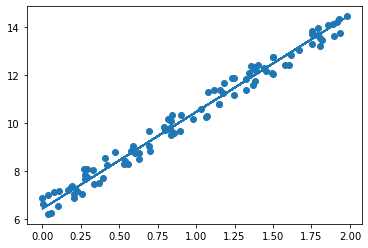

In [10]:
plt.scatter(X, y)
plt.plot(X, y_pred)

- 시간이 매우 오래 걸린다는 단점
- 확률적 경사 하강법 : 일부 데이터만 이용해 w가 업데이트되는 값 계산하므로 경사 하강법에 비해 빠른 속도 보장

In [11]:
# 미니 배치 확률적 경사 하강법 이용해 최적 비용함수 도출하기

In [13]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))
    
    prev_cost = 100000
    iter_index = 0
    
    for ind in range(iters):
        np.random.seed(ind)
        
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출해 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1=w1-w1_update
        w0=w0-w0_update
    
    return w1, w0

In [18]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print('w1:', round(w1[0, 0], 3), 'w0:',round(w0[0, 0], 3))
y_pred = w1[0, 0]*X+w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.048 w0: 6.422
Stochastic Gradient Descent Total Cost:0.1015


## 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측

### LinearRegression 클래스 - Ordinary Least Squares

- 예측값과 실제 값의 RSS를 최소화해 OLS 추정 방식으로 구현한 클래스
- fit() 메서드로 X, y 배열을 입력 받으면 회귀 계수인 W를 coef_ 속성에 저장

- 입력 파라미터
    - fit_intercept : boolean, 디폴트 True, intercept 값을 계산할 것인지 말지 지정, False면 intercept가 사용되지 않고 0으로 지정
    - normalize : boolean, 디폴트 False, fit_intercept가 False인 경우 이 파라미터 무시, 만일 True면 회귀 수행 전 입력 데이터 세트를 정규화
- 속성
    - coef_ : fit() 메서드 수행 시 회귀 계수가 배열 형태로 저장하는 속성. Shape는 (Target 값 개수, 피처 개수)
    - intercept_ : intercept 값

- 입력 피처의 독립성에 많은 영향 받음
- 피처 간의 상관관계가 매우 높은 경우 분산이 매우 커져 오류에 매우 민감해짐 ⇒ 다중 공선성 문제
- 상관관계가 높은 피처가 많은 경우 독립적인 중요한 피처만 남기고 제거하거나 규제 적용
- 매우 많은 피처가 다중 공선성 문제를 가지고 있다면 PCA를 통해 차원 축소를 수행하는 것 고려

### 회귀 평가 지표

- MAE : Mean Absolute Error, 실제 값과 예측값이 차이를 절댓값으로 변환해 평균한 것
- MSE : Mean Squared Error, 실제 값과 예측값의 차이를 제곱해 평균한 것
- RMSE : Root Mean Squared Error, MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있으므로 MSE에 루트 씌운 것
- R<sup>2</sup> : 분산 기반으로 예측 성능 평가, 실제 값의 분산 대비 예측값의 분산 비율을 지표로, 1에 가까울수록 예측 정확도 높음

- 사이킷런엣서 RMSE 제공X → MSE에 제곱근 씌워서 계산

- 각 평가 방법에 대한 사이킷런의 API 및 cross_val_score나 GridSearchCV에서 평가 시 사용되는 scoring 파라미터 적용 값

|        평가 방법        |    사이킷런 평가 지표 API   | Scoring 함수 적용 값 |
|:------------------:|:-------------:|:------:|
|  MAE | metrics.mean_absolute_error | 'neg_mean_absolute_error' |
|  MSE | metrics.mean_squared_error | 'neg_mean_squared_error' |
|  R<sup>2</sup> | metrics.r2_score | 'r2' |

- MAE의 scoring 파라미터 값을 보면 neg_라는 접두어가 있는데 이는 Negative 값을 가진다는 의미
- MAE는 절댓값의 합이기 때문에 음수가 될 수 없음
- Scoring 함수에 이를 적용해 음수값을 반환하는 이유는 사이킷런의 Scoring 함수가 score 값이 클수록 좋은 평가 결과로 자동 평가하기 때문
- 회귀 평가 지표의 경우 값이 커지면 오히려 나쁜 모델이라는 의미이므로 사이킷런의 Scoring 함수에 일반적으로 반영하려면 보정 필요
- 따라서 -1을 원래 지표에 곱해 음수를 만들어 작은 오류 값이 더 큰 숫자로 인식하게 함

### LinearRegression을 이용해 보스턴 주택 가격 회귀 구현

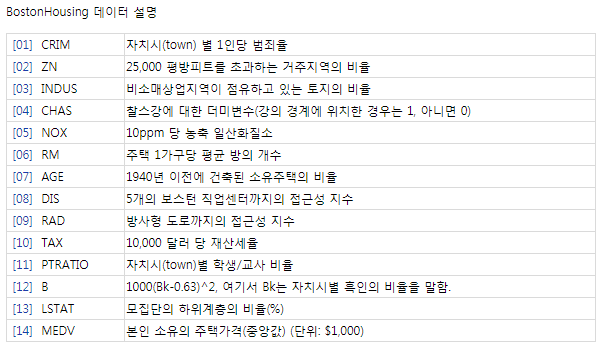

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from scipy import stats
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')

In [2]:
boston = load_boston()

In [4]:
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

In [5]:
# target = 주택 가격
bostonDF['PRICE'] = boston.target
print('Boston 데이터 세트 크기:', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


- Null값 없고 모두 float형

각 칼럼이 회귀 결과에 미치는 영향이 어느 정도인지 시각화해보기
- seaborn의 regplot() : X, Y축 값의 산점도화 함께 선형 회귀 직선 그려줌
- matplotlib.subplots() : 각 ax마다 칼럼과 PRICE의 관계 표현
    - ncols : 열 방향으로 위치할 그래프 개수
    - nrows : 행 방향으로 위치할 그랲 ㅡ개수

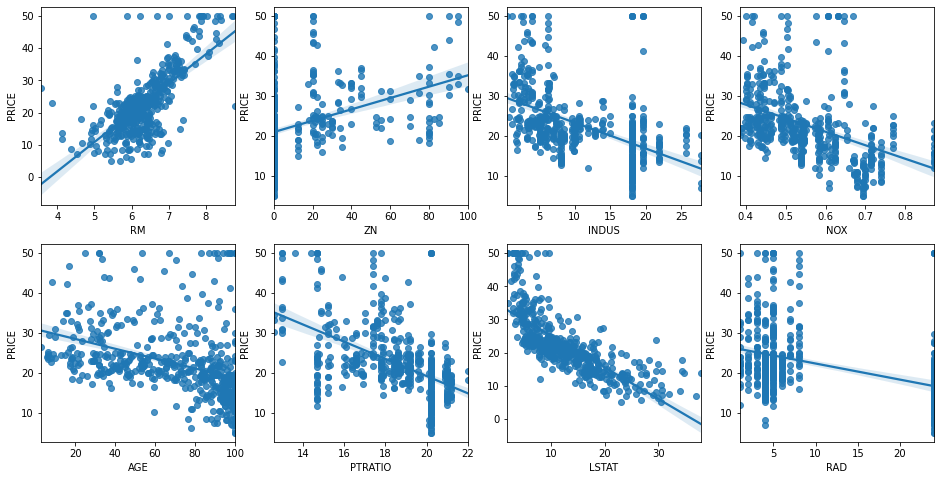

In [7]:
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선 함께 표현
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

- RM과 LSTAT의 PRICE 영향도가 가장 두드러지게 나타남
- RM(방개수) 양 방향의 선형성이 가장 큼
- LSTAT(하위 계층의 비율) 음 방향의 선형성이 가장 큼

In [9]:
# LinearRegression 클래스를 이용해 회귀 모델 만들기
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3F}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297, RMSE : 4.159
Variance score : 0.757


In [11]:
# 절편과 화귀계수
print('절편 값:', lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: 40.995595172164336
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [12]:
# 회귀 계수 값 피처별 회귀 계수 값으로 매핑, 높은 값 순으로 출력
coeff = pd.Series(data=np.round(lr.coef_, 1), index = X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

- RM 양의 값으로 회귀 계수 가장 큼
- NOX 피처의 회귀 계수 - 값이 너무 큼 → 최적화 수행하면서 계수 변화 살펴볼 것

5개의 폴드 세트에서 cross_val_score() 이용해 교차 검증으로 MSE, RMSE 측정해보기

In [13]:
from sklearn.model_selection import cross_val_score

In [15]:
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

lr = LinearRegression()

neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)  # cross_val_score의 반환값이 음수이므로 -1을 곱해야 양의 값인 원래 모델에서 계산된 MSE 값
avg_rmse = np.mean(rmse_scores)

print('5 folds 의 개별 Negative MSE scores:', np.round(neg_mse_scores, 2))
print('5 folds의 개별 RMSE scores:', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE :', np.round(avg_rmse, 3))

5 folds 의 개별 Negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE : 5.829


## 다항 회귀와 과(대)적합/과소적합 이해

- 독립변수의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현되는 것
- 선형 회귀
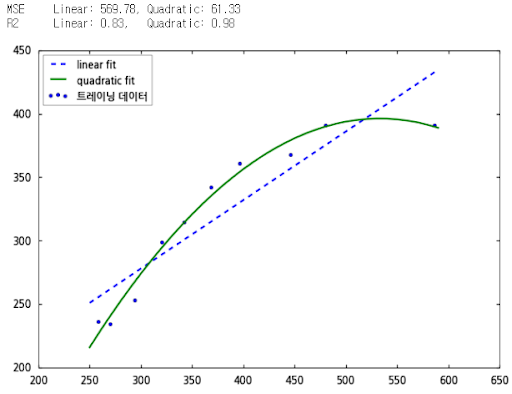

- PolynomialFeatures 클래스 통해 피처를 Polynomial 피처로 변환
- degree 파라미터를 통해 입력 받은 단항식 피처를 degree에 해당하는 다항식 피처로 변환

In [16]:
# 단항값을 2차 다항값으로 변환하는 예제
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

In [20]:
X = np.arange(4).reshape(2, 2)
print('일차 단항식 계수 피처:\n', X)

poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n', poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


x1, x1<br>
1, x1, x2, x1<sup>2</sup> x1x2, x2<sup>2</sup>

In [21]:
# 3차 다항 계수 이용해 3차 다항 회귀 함수식 유도해보기
# 3차 다항 회귀 함수 임의로 설정하고 회귀 계수 예측
def polynomial_func(X):
    y = 1+2*X[:,0]+3*X[:,0]**2+4*X[:,1]**3
    return y

In [22]:
X=np.arange(4).reshape(2, 2)
print('일차 단항식 계수 feature:\n', X)
y = polynomial_func(X)
print('삼차 다항식 결정값:\n', y)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
삼차 다항식 결정값:
 [  5 125]


In [23]:
# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature:\n', poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수\n', np.round(model.coef_, 2))
print('Polynomial 회귀 Shape:', model.coef_.shape)

3차 다항식 계수 feature:
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape: (10,)


처음에 가정한 회귀 함수식 : y = 1 + 2x<sub>1</sub> + 3x<sub>1</sub><sup>2</sup> + 4x<sub>2</sub><sup>3</sup><br>
계수 값 = [1, 2, 0, 3, 0, 0, 0, 0, 0, 4]<br>
차이는 있지만 다항 회귀로 근사하고 있음

In [25]:
# Pipeline 객체를 이용해 한 번에 다항 회귀 구현 코드 명료하게!
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

In [26]:
def polynomial_func(X):
    y = 1+2*X[:,0]+3*X[:,0]**2+4*X[:,1]**3
    return y

model = Pipeline([('poly', PolynomialFeatures(degree=3)), ('linear', LinearRegression())])
X = np.arange(4).reshape(2, 2)
y = polynomial_func(X)

model = model.fit(X, y)

print('Polynomial 회귀 계수 \n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


### 다항 회귀를 이용한 과소적합 및 과적합 이해

- 다항식의 차수가 높아질수록 매우 복잡한 피처 간의 관계까지 모델링 가능
- 하지만 차수를 높일수록 테스트 데이터 화경에서 오히려 예측 정확도 떨어짐 ⇒ 과적합 문제

과적합 잘 보여주는 예제
- 데이터 세트 : 피처 X, target y가 잡음이 포함된 다항식의 코사인 그래프 관계 가지도록 만들어줌
- 다항 회귀의 차수를 변화시키면서 그에 따른 회귀 예측 곡선과 예측 정확도 비교

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [29]:
# 임의의 값으로 구성된 X값에 대해 코사인 변환 값 반환
def true_fun(X):
    return np.cos(1.5*np.pi*X)

In [30]:
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

y = true_fun(X) + np.random.randn(n_samples)*0.1


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE는 0.40772896250986834입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE는 0.04320874987231747입니다.

Degree 15 회귀 계수는 [-2.98295000e+03  1.03899930e+05 -1.87417069e+06  2.03717225e+07
 -1.44873988e+08  7.09318780e+08 -2.47066977e+09  6.24564048e+09
 -1.15677067e+10  1.56895696e+10 -1.54006776e+10  1.06457788e+10
 -4.91379977e+09  1.35920330e+09 -1.70381654e+08] 입니다.
Degree 15 MSE는 182815433.47648773입니다.


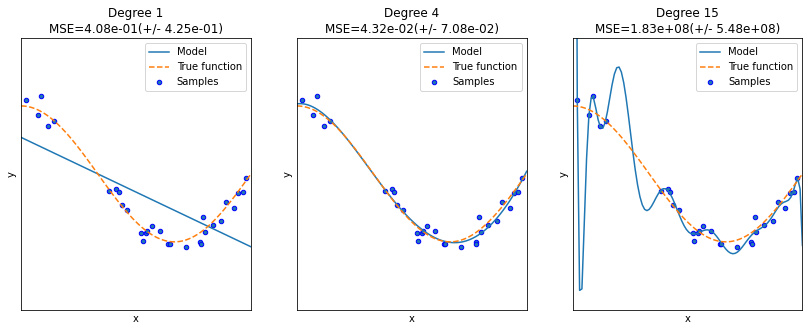

In [32]:
# 비교할 다항식 차수 1, 4, 15
# MSE로 예측 성능 평가
# 차수별 회귀 예측 곡선 그리기

plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree 별로 Polynomial 반환
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차 검증으로 다항 회귀 평가
    scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring="neg_mean_squared_error", cv=10)
    # Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print("\nDegree {} 회귀 계수는 {} 입니다.".format(degrees[i], np.round(coefficients, 2)))
    print('Degree {} MSE는 {}입니다.'.format(degrees[i], -1*np.mean(scores)))
    
    # 0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려 비교
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel("x");plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2));plt.legend(loc="best")
    plt.title("Degree {}\nMSE={:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))
    
plt.show()

- 실선 : 예측 곡선, 점선 : 실제 데이터 세트의 코사인 곡선

- 맨 왼쪽 곡선 : 산순 선형 회귀, 예측 곡선이 학습 데이터의 패턴 제대로 반영하지 못하고 있는 과소적합 모델
- 가운데 곡선 : 실제 데이터 세트와 유사한 모습. 학습 데이터 세트를 비교적 잘 반영해 테스트 데이터를 잘 예측한 곡선
- 맨 오른쪽 곡선 : MSE 값이 어처구니가 없음. 학습 데이터 세트만 정확히 예측하고 테스트 값의 실제 곡선과는 완전히 다른 형태의 예측 곡선. 과적합

### 편향-분산 트레이드오프(Bias-Variance Trade off)

- Degree 1과 같은 모델은 매우 단순화된 모델로 지나치게 한 방향성으로 치우진 경향 = 고편향(High Bias)성 가짐
- Degree 15와 같은 모델은 학습 데이터 하나하나의 특성 반영하면서 지나치게 높은 변동성 = 고분산(High Variance)성 가짐
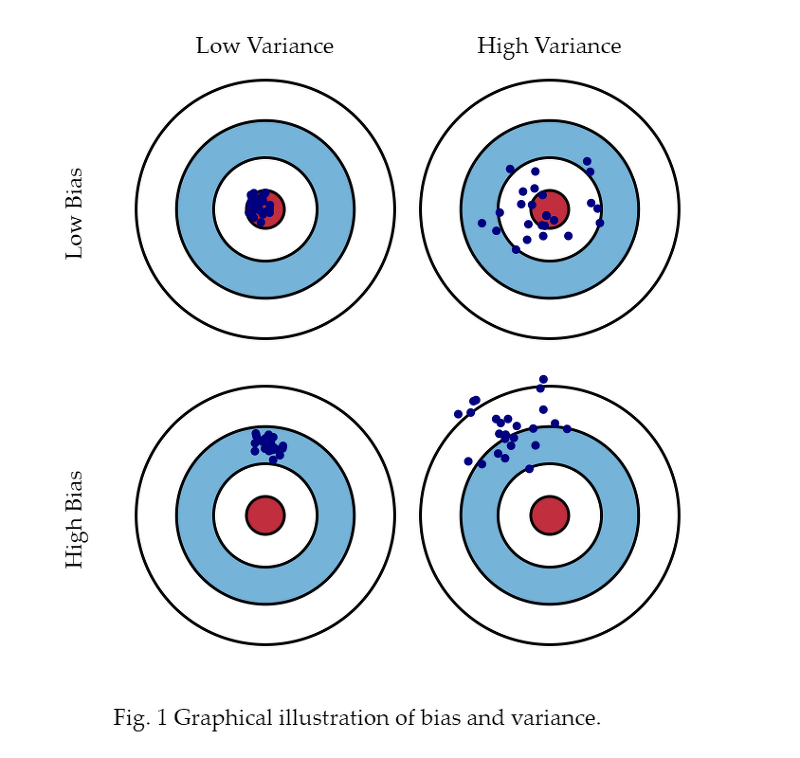

- 편향이 높으면 분산은 낮아지고(과소적합) 분산이 높으면 편향이 낮아짐(과적합)
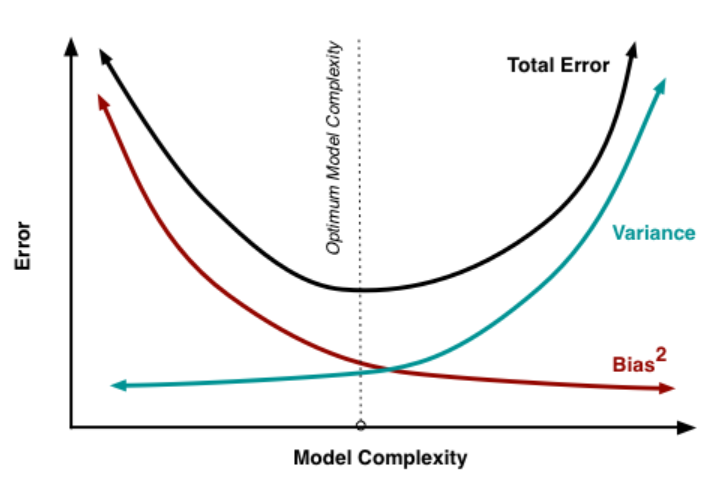